### Set up

In [1]:
#Import modules

import pandas as pd
pd.options.display.max_columns = 99
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import dask.dataframe as dd
from dask.diagnostics import ProgressBar

# from numpy import arange, log10

from functions import chunk, agg, finalize
tunique = dd.Aggregation('tunique', chunk, agg,finalize)
first = dd.Aggregation('first', chunk, agg,finalize)

## Sourcing info
### Arrange data

In [2]:
# path = './../../../../../../media/miglesia/Elements/export_france/data/type1/DP1610_MAASTRICHT1_1997_2013/''

KeyboardInterrupt: 

### Load data directly

In [7]:
out = pd.read_csv('./../data/processed/sourcing_strategies_qr.csv')
# out = pd.read_csv('./../data/export_bundles.csv')
out_ri = out.reset_index()
# product_count = out_ri.groupby('ID')[['CN ID 4']].nunique()
sources_count = out_ri.groupby('ID')[['PYOD']].nunique()
multisourcing_firms = sources_count[sources_count['PYOD'] > 1].index
df = out_ri.loc[out_ri.ID.isin(multisourcing_firms)]

In [8]:
firm_prod = df.groupby(['ID', 'CN ID 4']).sum()['VART'].reset_index()

firm_prod_pcts = firm_prod.groupby('ID')['VART'].apply(lambda x:
                                                 100 * x / float(x.sum()))
firm_prod['pct'] = firm_prod_pcts

### Show some examples of firm sourcing strategies in time

In [11]:
CN_full = pd.read_csv('./../data/CN_full.csv', encoding = 'utf-8')

sample_ids = df.sample(20)['ID'].values

#Select firms that import more than 10% of some product
# df_ = firm_prod.loc[(firm_prod['CN ID 4'] == 601) & (firm_prod['pct'] > 1)]
# sample_ids = df_.sample(10)['ID'].values

for id_ in sample_ids:
    df_ID = df.loc[df.ID == id_]
    
    by_product = df_ID.groupby('CN ID 4')['VART'].sum().sort_values(ascending = False)
    by_product/=by_product.sum()
    main_prods = by_product[by_product.cumsum() < .99].index
    df_ID_mp = df_ID.loc[df_ID['CN ID 4'].isin(main_prods)]
    
    table = df_ID_mp.set_index([u'CN ID 4', u'PYOD', u'QUARTER', u'YEAR'])['VART'].unstack([-1, -2]).fillna(0)
    table[('min','')] = 0; table[('max','')] = table.max().max()

    display(CN_full.set_index('CN ID 4')[['CN label 4']].drop_duplicates().loc[df_ID_mp['CN ID 4'].unique()].sort_index())

    display(table.T.style.bar(color='#d65f5f'))

CN label 4
CN ID 4                                                   
4202     Trunks, suitcases, vanity cases, executive-cas...
6102     Women's or girls' overcoats, car coats, capes,...
6105           Men's or boys' shirts, knitted or crocheted
6106     Women's or girls' blouses, shirts and shirt-bl...
6109     T-shirts, singlets and other vests, knitted or...
6110     Jerseys, pullovers, cardigans, waistcoats and ...
6112     Tracksuits, ski suits and swimwear, knitted or...
6114                  Other garments, knitted or crocheted
6202     Women's or girls' overcoats, car coats, capes,...
6204     Women's or girls' suits, ensembles, jackets, b...
6210     Garments, made up of fabrics of heading 5602, ...
6211     Tracksuits, ski suits and swimwear; other garm...
6402     Other footwear with outer soles and uppers of ...
6403     Footwear with outer soles of rubber, plastics,...
6404     Footwear with outer soles of rubber, plastics,...
9506     Articles and equipment for general physical ex...

CN label 4
CN ID 4                                                   
1302     Vegetable saps and extracts; pectic substances...
2511     Natural barium sulphate (barytes); natural bar...
3811     Anti-knock preparations, oxidation inhibitors,...
3823     Industrial monocarboxylic fatty acids; acid oi...
3906                     Acrylic polymers in primary forms
3912     Cellulose and its chemical derivatives, not el...
8207     Interchangeable tools for hand tools, whether ...
8413     Pumps for liquids, whether or not fitted with ...
8431     Parts suitable for use solely or principally w...
8481     Taps, cocks, valves and similar appliances for...
8537     Boards, panels, consoles, desks, cabinets and ...
8538     Parts suitable for use solely or principally w...
8544     Insulated (including enamelled or anodised) wi...
9015     Surveying (including photogrammetrical surveyi...
9027     Instruments and apparatus for physical or chem...

CN label 4
CN ID 4                                                   
2503     Sulphur of all kinds, other than sublimed sulp...
2512     Siliceous fossil meals (for example, kieselguh...
2517     Pebbles, gravel, broken or crushed stone, of a...
2522     Quicklime, slaked lime and hydraulic lime, oth...
2615     Niobium, tantalum, vanadium or zirconium ores ...
2713     Petroleum coke, petroleum bitumen and other re...
2818     Artificial corundum, whether or not chemically...
2825     Hydrazine and hydroxylamine and their inorgani...
2827     Chlorides, chloride oxides and chloride hydrox...
2831                         Dithionites and sulphoxylates
2841          Salts of oxometallic or peroxometallic acids
2905     Acyclic alcohols and their halogenated, sulpho...
2922                       Oxygen-function amino-compounds
3206     Other colouring matter; preparations as specif...
3815     Reaction initiators, reaction accelerators and...
4415     Packing cases, boxes, crates, drums and simila...
4819     Cartons, boxes, cases, bags and other packing ...
6909     Ceramic wares for laboratory, chemical or othe...
7204     Ferrous waste and scrap; remelting scrap ingot...
7326                       Other articles of iron or steel
8416     Furnace burners for liquid fuel, for pulverise...
8421     Centrifuges, including centrifugal dryers; fil...
8474     Machinery for sorting, screening, separating, ...
8481     Taps, cocks, valves and similar appliances for...
9027     Instruments and apparatus for physical or chem...

CN label 4
CN ID 4                                                   
203                Meat of swine, fresh, chilled or frozen
210      Meat and edible meat offal, salted, in brine, ...
303      Fish, frozen, excluding fish fillets and other...
305      Fish, dried, salted or in brine; smoked fish, ...
306      Crustaceans, whether in shell or not, live, fr...
307      Molluscs, whether in shell or not, live, fresh...
404      Whey, whether or not concentrated or containin...
601      Bulbs, tubers, tuberous roots, corms, crowns a...
602      Other live plants (including their roots), cut...
702                             Tomatoes, fresh or chilled
709                     Other vegetables, fresh or chilled
710      Vegetables (uncooked or cooked by steaming or ...
805                           Citrus fruit, fresh or dried
807      Melons (including watermelons) and papaws (pap...
809      Apricots, cherries, peaches (including nectari...
901      Coffee, whether or not roasted or decaffeinate...
1006                                                  Rice
1302     Vegetable saps and extracts; pectic substances...
1508     Groundnut oil and its fractions, whether or no...
1509     Olive oil and its fractions, whether or not re...
1512     Sunflower-seed, safflower or cotton-seed oil a...
1517     Margarine; edible mixtures or preparations of ...
1602     Other prepared or preserved meat, meat offal o...
1605     Crustaceans, molluscs and other aquatic invert...
1704     Sugar confectionery (including white chocolate...
1806     Chocolate and other food preparations containi...
1902     Pasta, whether or not cooked or stuffed (with ...
1904     Prepared foods obtained by the swelling or roa...
1905     Bread, pastry, cakes, biscuits and other baker...
2004     Other vegetables prepared or preserved otherwi...
...                                                    ...
6211     Tracksuits, ski suits and swimwear; other garm...
6302     Bedlinen, table linen, toilet linen and kitche...
6804     Millstones, grindstones, grinding wheels and t...
6810     Articles of cement, of concrete or of artifici...
7003     Cast glass and rolled glass, in sheets or prof...
7005     Float glass and surface ground or polished gla...
7321     Stoves, ranges, grates, cookers (including tho...
7616                           Other articles of aluminium
8007                                 Other articles of tin
8207     Interchangeable tools for hand tools, whether ...
8212     Razors and razor blades (including razor blade...
8215     Spoons, forks, ladles, skimmers, cake-servers,...
8302     Base-metal mountings, fittings and similar art...
8433     Harvesting or threshing machinery, including s...
8465     Machine tools (including machines for nailing,...
8467     Tools for working in the hand, pneumatic, hydr...
8481     Taps, cocks, valves and similar appliances for...
8516     Electric instantaneous or storage water heater...
8535     Electrical apparatus for switching or protecti...
8536     Electrical apparatus for switching or protecti...
8539     Electric filament or discharge lamps, includin...
9401     Seats (other than those of heading 9402), whet...
9403                     Other furniture and parts thereof
9405     Lamps and lighting fittings including searchli...
9504     Video game consoles and machines, articles for...
9506     Articles and equipment for general physical ex...
9603     Brooms, brushes (including brushes constitutin...
9608     Ballpoint pens; felt-tipped and other porous-t...
9609     Pencils (other than pencils of heading 9608), ...
9611     Date, sealing or numbering stamps, and the lik...

[88 rows x 1 columns]

CN label 4
CN ID 4                                                   
3215     Printing ink, writing or drawing ink and other...
3701     Photographic plates and film in the flat, sens...
3702     Photographic film in rolls, sensitised, unexpo...
3707     Chemical preparations for photographic uses (o...
3920     Other plates, sheets, film, foil and strip, of...
4816     Carbon paper, self-copy paper and other copyin...
5911     Textile products and articles, for technical u...
7804     Lead plates, sheets, strip and foil; lead powd...
8471     Automatic data-processing machines and units t...
8544     Insulated (including enamelled or anodised) wi...
9006     Photographic (other than cinematographic) came...
9008     Image projectors, other than cinematographic; ...
9010     Apparatus and equipment for photographic (incl...
9013     Liquid crystal devices not constituting articl...
9018     Instruments and appliances used in medical, su...
9603     Brooms, brushes (including brushes constitutin...
9612     Typewriter or similar ribbons, inked or otherw...

CN label 4
CN ID 4                                                   
1704     Sugar confectionery (including white chocolate...
1806     Chocolate and other food preparations containi...
1905     Bread, pastry, cakes, biscuits and other baker...
2517     Pebbles, gravel, broken or crushed stone, of a...
3213     Artists', students' or signboard painters' col...
3303                            Perfumes and toilet waters
3304     Beauty or make-up preparations and preparation...
3307     Pre-shave, shaving or aftershave preparations,...
3402     Organic surface-active agents (other than soap...
3407     Modelling pastes, including those put up for c...
3506     Prepared glues and other prepared adhesives, n...
3605     Matches, other than pyrotechnic articles of he...
3923     Articles for the conveyance or packing of good...
3924     Tableware, kitchenware, other household articl...
3926     Other articles of plastics and articles of oth...
4016     Other articles of vulcanised rubber other than...
4202     Trunks, suitcases, vanity cases, executive-cas...
4414     Wooden frames for paintings, photographs, mirr...
4419                    Tableware and kitchenware, of wood
4420     Wood marquetry and inlaid wood; caskets and ca...
4602     Basketwork, wickerwork and other articles, mad...
4818     Toilet paper and similar paper, cellulose wadd...
4819     Cartons, boxes, cases, bags and other packing ...
4820     Registers, account books, notebooks, order boo...
4905     Maps and hydrographic or similar charts of all...
5702     Carpets and other textile floor coverings, wov...
5703     Carpets and other textile floor coverings, tuf...
6102     Women's or girls' overcoats, car coats, capes,...
6104     Women's or girls' suits, ensembles, jackets, b...
6109     T-shirts, singlets and other vests, knitted or...
...                                                    ...
7117                                   Imitation jewellery
7318     Screws, bolts, nuts, coach screws, screw hooks...
7323     Table, kitchen or other household articles and...
8201     Hand tools, the following: spades, shovels, ma...
8203     Files, rasps, pliers (including cutting pliers...
8204     Hand-operated spanners and wrenches (including...
8205     Hand tools (including glaziers' diamonds), not...
8206     Tools of two or more of headings 8202 to 8205,...
8210     Hand-operated mechanical appliances, weighing ...
8214     Other articles of cutlery (for example, hair c...
8215     Spoons, forks, ladles, skimmers, cake-servers,...
8301     Padlocks and locks (key, combination or electr...
8306     Bells, gongs and the like, non-electric, of ba...
8423     Weighing machinery (excluding balances of a se...
8424     Mechanical appliances (whether or not hand-ope...
8470     Calculating machines and pocket-size data-reco...
8513     Portable electric lamps designed to function b...
8716     Trailers and semi-trailers; other vehicles, no...
9004     Spectacles, goggles and the like, corrective, ...
9102     Wristwatches, pocket-watches and other watches...
9105                                          Other clocks
9401     Seats (other than those of heading 9402), whet...
9403                     Other furniture and parts thereof
9404     Mattress supports; articles of bedding and sim...
9405     Lamps and lighting fittings including searchli...
9505     Festive, carnival or other entertainment artic...
9506     Articles and equipment for general physical ex...
9507     Fishing rods, fish-hooks and other line fishin...
9603     Brooms, brushes (including brushes constitutin...
9613     Cigarette lighters and other lighters, whether...

[85 rows x 1 columns]

CN label 4
CN ID 4                                                   
2505     Natural sands of all kinds, whether or not col...
3307     Pre-shave, shaving or aftershave preparations,...
3924     Tableware, kitchenware, other household articl...
3926     Other articles of plastics and articles of oth...
4202     Trunks, suitcases, vanity cases, executive-cas...
4414     Wooden frames for paintings, photographs, mirr...
4419                    Tableware and kitchenware, of wood
4420     Wood marquetry and inlaid wood; caskets and ca...
4503                              Articles of natural cork
4602     Basketwork, wickerwork and other articles, mad...
4817     Envelopes, letter cards, plain postcards and c...
4818     Toilet paper and similar paper, cellulose wadd...
4819     Cartons, boxes, cases, bags and other packing ...
4820     Registers, account books, notebooks, order boo...
5609     Articles of yarn, strip or the like of heading...
5702     Carpets and other textile floor coverings, wov...
5806     Narrow woven fabrics, other than goods of head...
6115     Pantyhose, tights, stockings, socks and other ...
6301                          Blankets and travelling rugs
6302     Bedlinen, table linen, toilet linen and kitche...
6304     Other furnishing articles, excluding those of ...
6306     Tarpaulins, awnings and sunblinds; tents; sail...
6601     Umbrellas and sun umbrellas (including walking...
6702     Artificial flowers, foliage and fruit and part...
6802     Worked monumental or building stone (except sl...
6809     Articles of plaster or of compositions based o...
6911     Tableware, kitchenware, other household articl...
6912     Ceramic tableware, kitchenware, other househol...
6913      Statuettes and other ornamental ceramic articles
7009     Glass mirrors, whether or not framed, includin...
7013     Glassware of a kind used for table, kitchen, t...
7018     Glass beads, imitation pearls, imitation preci...
7323     Table, kitchen or other household articles and...
7907                                Other articles of zinc
8210     Hand-operated mechanical appliances, weighing ...
8214     Other articles of cutlery (for example, hair c...
8215     Spoons, forks, ladles, skimmers, cake-servers,...
8306     Bells, gongs and the like, non-electric, of ba...
9105                                          Other clocks
9401     Seats (other than those of heading 9402), whet...
9403                     Other furniture and parts thereof
9404     Mattress supports; articles of bedding and sim...
9405     Lamps and lighting fittings including searchli...
9505     Festive, carnival or other entertainment artic...
9506     Articles and equipment for general physical ex...
9603     Brooms, brushes (including brushes constitutin...
9608     Ballpoint pens; felt-tipped and other porous-t...

CN label 4
CN ID 4                                          
201      Meat of bovine animals, fresh or chilled

CN label 4
CN ID 4                                                   
8432     Agricultural, horticultural or forestry machin...
8708     Parts and accessories of the motor vehicles of...
8716     Trailers and semi-trailers; other vehicles, no...

CN label 4
CN ID 4                                                   
6911     Tableware, kitchenware, other household articl...

CN label 4
CN ID 4                                                   
3921     Other plates, sheets, film, foil and strip, of...
6809     Articles of plaster or of compositions based o...
7302     Railway or tramway track construction material...
8302     Base-metal mountings, fittings and similar art...

CN label 4
CN ID 4                                                   
3811     Anti-knock preparations, oxidation inhibitors,...
5111     Woven fabrics of carded wool or of carded fine...
5112     Woven fabrics of combed wool or of combed fine...
5209     Woven fabrics of cotton, containing 85 % or mo...
5210     Woven fabrics of cotton, containing less than ...
5309                                 Woven fabrics of flax
5407     Woven fabrics of synthetic filament yarn, incl...
5408     Woven fabrics of artificial filament yarn, inc...
5503     Synthetic staple fibres, not carded, combed or...
5513     Woven fabrics of synthetic staple fibres, cont...
5515        Other woven fabrics of synthetic staple fibres
5516             Woven fabrics of artificial staple fibres
5801     Woven pile fabrics and chenille fabrics, other...
6106     Women's or girls' blouses, shirts and shirt-bl...
6109     T-shirts, singlets and other vests, knitted or...
6110     Jerseys, pullovers, cardigans, waistcoats and ...
6204     Women's or girls' suits, ensembles, jackets, b...
6206     Women's or girls' blouses, shirts and shirt-bl...
9606     Buttons, press-fasteners, snap-fasteners and p...

CN label 4
CN ID 4                                                   
5309                                 Woven fabrics of flax
5407     Woven fabrics of synthetic filament yarn, incl...

Empty DataFrame
Columns: [CN label 4]
Index: []

IndexError: list index out of range

CN label 4
CN ID 4                                                   
8540     Thermionic, cold cathode or photocathode valve...
9202     Other string musical instruments (for example,...
9207     Musical instruments, the sound of which is pro...
9209     Parts (for example, mechanisms for musical box...

CN label 4
CN ID 4                                                   
2522     Quicklime, slaked lime and hydraulic lime, oth...
2825     Hydrazine and hydroxylamine and their inorgani...
2850     Hydrides, nitrides, azides, silicides and bori...
2905     Acyclic alcohols and their halogenated, sulpho...
2907                              Phenols; phenol-alcohols
2910     Epoxides, epoxyalcohols, epoxyphenols and epox...
2912     Aldehydes, whether or not with other oxygen fu...
2914     Ketones and quinones, whether or not with othe...
2915     Saturated acyclic monocarboxylic acids and the...
3402     Organic surface-active agents (other than soap...
3803                      Tall oil, whether or not refined
3805     Gum, wood or sulphate turpentine and other ter...
3815     Reaction initiators, reaction accelerators and...
3823     Industrial monocarboxylic fatty acids; acid oi...
3911     Petroleum resins, coumarone-indene resins, pol...
7310     Tanks, casks, drums, cans, boxes and similar c...
8419     Machinery, plant or laboratory equipment, whet...
8479     Machines and mechanical appliances having indi...

CN label 4
CN ID 4                                                   
3902     Polymers of propylene or of other olefins, in ...
4005     Compounded rubber, unvulcanised, in primary fo...
4006     Other forms (for example, rods, tubes and prof...
6307      Other made-up articles, including dress patterns
6804     Millstones, grindstones, grinding wheels and t...
8202     Handsaws; blades for saws of all kinds (includ...
8207     Interchangeable tools for hand tools, whether ...
8467     Tools for working in the hand, pneumatic, hydr...
8477     Machinery for working rubber or plastics or fo...
8479     Machines and mechanical appliances having indi...
8480     Moulding boxes for metal foundry; mould bases;...
8536     Electrical apparatus for switching or protecti...

CN label 4
CN ID 4                                                   
8202     Handsaws; blades for saws of all kinds (includ...
8208     Knives and cutting blades, for machines or for...
8407     Spark-ignition reciprocating or rotary interna...
8409     Parts suitable for use solely or principally w...
8424     Mechanical appliances (whether or not hand-ope...
8430     Other moving, grading, levelling, scraping, ex...
8432     Agricultural, horticultural or forestry machin...
8433     Harvesting or threshing machinery, including s...
8467     Tools for working in the hand, pneumatic, hydr...
8511     Electrical ignition or starting equipment of a...
8547     Insulating fittings for electrical machines, a...
8701        Tractors (other than tractors of heading 8709)
8708     Parts and accessories of the motor vehicles of...
9401     Seats (other than those of heading 9402), whet...

CN label 4
CN ID 4                                                   
3924     Tableware, kitchenware, other household articl...
3926     Other articles of plastics and articles of oth...
4202     Trunks, suitcases, vanity cases, executive-cas...
6405                                        Other footwear
6912     Ceramic tableware, kitchenware, other househol...
6913      Statuettes and other ornamental ceramic articles
8215     Spoons, forks, ladles, skimmers, cake-servers,...
9105                                          Other clocks

CN label 4
CN ID 4                                                   
4819     Cartons, boxes, cases, bags and other packing ...
6112     Tracksuits, ski suits and swimwear, knitted or...
8407     Spark-ignition reciprocating or rotary interna...
8408     Compression-ignition internal combustion pisto...
8409     Parts suitable for use solely or principally w...

/home/miglesia/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log10


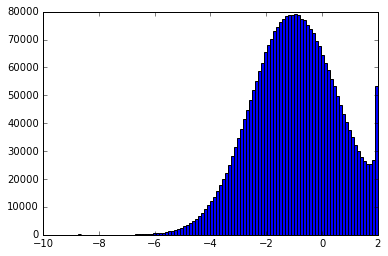

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(np.log10(firm_prod['pct']).replace(-np.inf, np.nan).dropna().values, 100)
plt.show()